# **Weather Forecasting Project**

Statistical Models for Data Science,

Marco Colognesi - VR495478


## **Loading, Converting and Cleaning of the Data**

In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The project starts with the **loading**, **converting** and **cleaning** of the data:
* Data is imported with the `pd.read_csv` method: the `['date']` column is **parsed** into a `'datetime64[ns]'` format thanks to the `parse_dates` option and is going to be used as a `DatetimeIndex`, the ideal type of index for a **time series analysis**.
* The **frequency** of the data is specified thanks to the `.asfreq()` method: in particular, our data shows a **calendar day frequency** (*daily*).

In [2]:
# Importing Training Data
data = pd.read_csv(
            filepath_or_buffer='Weather ForecastingTrain.csv',
            # Parsing dates and using ['date'] as column
            parse_dates=['date'], index_col=['date']
            )

# Specifying the frequency as daily --> ('D') = calendar day frequency
data = data.asfreq('D')

# Showing a snippet of the data
display(data)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762


Our **training dataset** provides **daily data** from the *1st of January 2013* to the *31st of December 2016*: a total of `1461` **observations**.

There are **4 parameters** (*columns*) describing weather, that are: `meantemp` (*which will be used as dependent variable for the forecast*), `humidity`, `wind_speed`, and `meanpressure`.


In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-01-01 to 2016-12-31
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1461 non-null   float64
 1   humidity      1461 non-null   float64
 2   wind_speed    1461 non-null   float64
 3   meanpressure  1461 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


To perform the **data cleaning** part, the presence of **null values** needs to be assessed: this can be done thanks to the `.isnull()` method.

In [4]:
# Checking if there are nulle values in the data (NaN)
print('Null values in the dataset:\n', data.isnull().sum())

Null values in the dataset:
 meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


There are **no null values** in our training data, thus no data cleaning operations is required at the moment.

## **Exploring the dataset**

### **Descriptive Statistics**

In [5]:
# Adding 'Month' column (DatetimeIndex -> Period)
data['Month'] = data.index.to_period('M')
# Adding 'Year' column (DatetimeIndex -> Period)
data['Year'] = data.index.to_period('Y')

data

,meantemp,humidity,wind_speed,meanpressure,Month,Year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01,2013
...,...,...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000,2016-12,2016
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016-12,2016
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016-12,2016


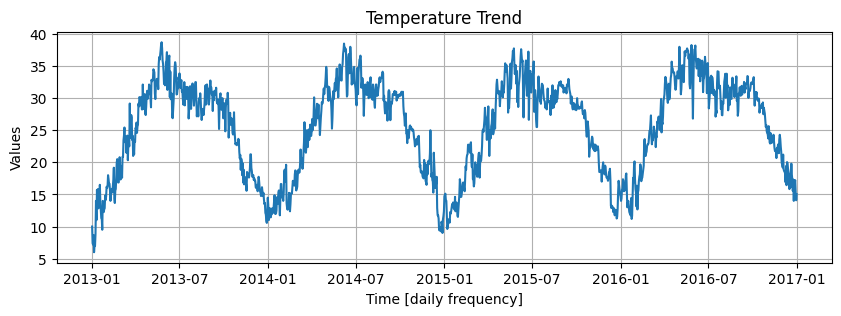

In [18]:
plt.figure(figsize=(10,3))
plt.grid()
plt.plot(data['meantemp'])
plt.title('Temperature Trend')
plt.xlabel('Time [daily frequency]')
plt.ylabel('Values')
plt.show()

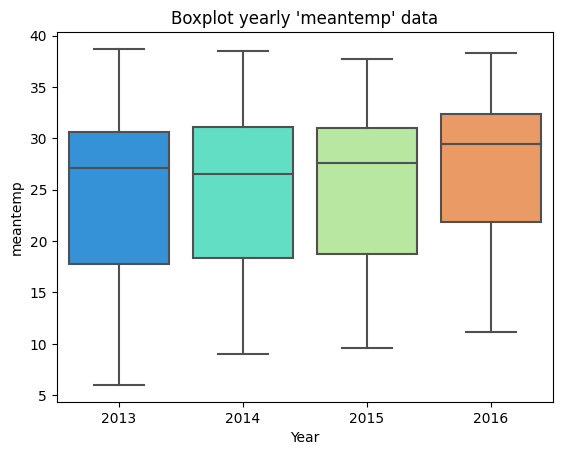

In [41]:
sns.boxplot(data=data, x='Year', y='meantemp', palette='rainbow')
plt.title("Boxplot yearly 'meantemp' data")
plt.show()

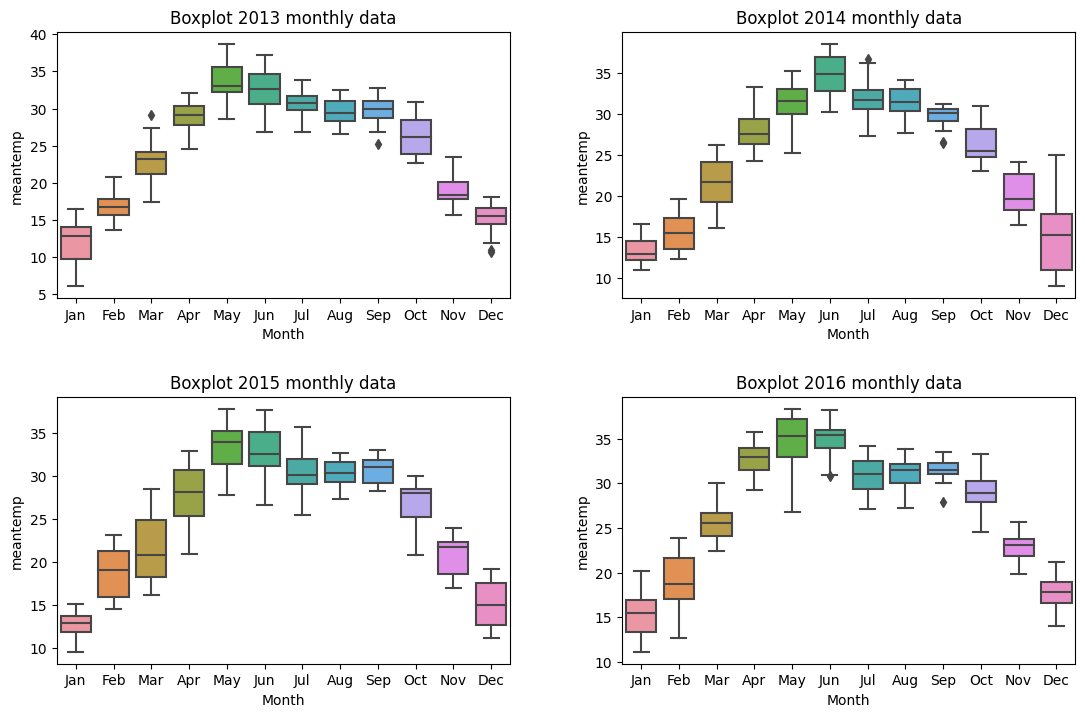

In [133]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
fig.tight_layout(pad=5)
sns.boxplot(x= data[data.index.year == 2013]['Month'].dt.strftime('%b'), y= data[data.index.year == 2013]['meantemp'], ax=axes[0,0]).set_title('Boxplot 2013 monthly data')
sns.boxplot(x= data[data.index.year == 2014]['Month'].dt.strftime('%b'), y= data[data.index.year == 2014]['meantemp'], ax=axes[0,1]).set_title('Boxplot 2014 monthly data')
sns.boxplot(x= data[data.index.year == 2015]['Month'].dt.strftime('%b'), y= data[data.index.year == 2015]['meantemp'], ax=axes[1,0]).set_title('Boxplot 2015 monthly data')
sns.boxplot(x= data[data.index.year == 2016]['Month'].dt.strftime('%b'), y= data[data.index.year == 2016]['meantemp'], ax=axes[1,1]).set_title('Boxplot 2016 monthly data')
plt.show()